# CS 371 Exercises

## Exercise 1: [Gapminder](https://www.gapminder.org/data/): Relationship of GDP Per Capita to Life Expectancy
([Life Expectancy Dataset Documentation](https://www.gapminder.org/data/documentation/gd004/))
([GDP Per Capita Dataset Documentation](https://www.gapminder.org/data/documentation/gd001/))

Attibution: FREE DATA FROM WORLD BANK VIA GAPMINDER.ORG, CC-BY LICENSE

In the code below, we collect the years 2015-2019 and pair national GDP per capita data with national life expectancy data for those years.

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# load the Gapminder locally-stored gdp_pcap.csv dataset into a dataframe. Rows are countries, columns are years
gdp = pd.read_csv('gdp_pcap.csv', index_col=0)
# load the Gapminder locally-stored lex.csv dataset into a dataframe. Rows are countries, columns are years
lex = pd.read_csv('lex.csv', index_col=0)
# eliminate all but years 2015-2019 from the gdp and lex dataframes
gdp = gdp[['2015', '2016', '2017', '2018', '2019']]
lex = lex[['2015', '2016', '2017', '2018', '2019']]
# create a new dataframe called gdp_lex that has columns "country", "year", "gdp", and "life_exp", drawing data from the gdp and lex dataframes
gdp_lex = pd.DataFrame({'gdp': gdp.stack(), 'life_exp': lex.stack()})
gdp_lex.index.names = ['country', 'year']
gdp_lex.reset_index(inplace=True)
# drop rows with missing values
gdp_lex.dropna(inplace=True)
# convert life_exp to numeric data
gdp_lex['life_exp'] = pd.to_numeric(gdp_lex['life_exp'], errors='coerce')

def parse_gdp(gdp_str):
    try:
        return float(gdp_str)
    except:
        # if the string ends with "k", return the parsed number before "k" multiplied by 1000
        if gdp_str.endswith('k'):
            return float(gdp_str[:-1]) * 1000
        else:
            return np.nan

# convert gdp to numeric data
gdp_lex['gdp'] = gdp_lex['gdp'].apply(parse_gdp)

# add a new column "log_gdp" to the gdp_lex dataframe that contains the logarithm base 10 of the "gdp" column
gdp_lex['log_gdp'] = np.log10(gdp_lex['gdp'])

gdp_lex.head()

country  year     gdp  life_exp   log_gdp
0  Afghanistan  2015  2110.0      61.9  3.324282
1  Afghanistan  2016  2100.0      62.0  3.322219
2  Afghanistan  2017  2100.0      62.9  3.322219
3  Afghanistan  2018  2060.0      62.7  3.313867
4  Afghanistan  2019  2080.0      63.3  3.318063

In [4]:
# TODO: Perform the following steps on the gdp_lex dataset:

# Shuffle the dataset rows with the given seed (0).

# Split it into equal training and testing sets using random_state=0.

# Divide the training and testing sets into input features ("log_gdp") and output values ("life_exp").

# Perform a linear regression on the training set.

# Predict the life expectancy of the testing set using the trained model.

# Plot the true life expectancy values against the log GDP with a scatter plot.

# Plot the predicted life expectancy values against the log GDP with a line plot.

# Display the coefficients and the intercept of the linear regression

# Calculate and print the R^2 score of the model on the testing set.

# Given that an increase of 1 in log GDP corresponds to an increase of 10 in GDP, what is the predicted increase in life expectancy for each 10-fold increase in GDP?
# Display this increase to 1 decimal place.
  

## Exercise 2: Hyperparameter Tuning for $k$-Nearest Neighbor Classification

In this exercise, you'll seek to tune a best choice of $k$ for $k$-Nearest Neighbor Classification on a synthetic dataset created as follows:

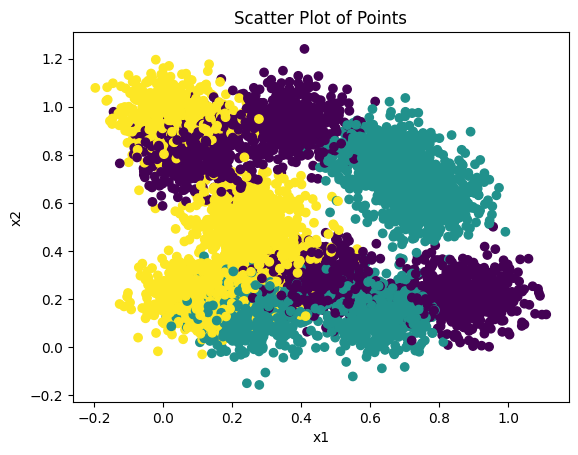

In [5]:
num_classes = 3
num_centers_per_class = 4
points_per_center = 500
seed = 42
stdev = 0.08
np.random.seed(seed)
# 2D center coordinates for each class are generated at random according to a random number seed
centers = np.random.rand(num_classes * num_centers_per_class, 2)
# For 100 iterations,
for _ in range(100):
    # Generate a random 2D point
    point = np.random.rand(2)
    # Find the closest center to the point
    closest_center = np.argmin(np.linalg.norm(centers - point, axis=1))
    # Move the closest center 10% of the way towards the point
    centers[closest_center] += 0.1 * (point - centers[closest_center])
# Create an empty dataframe df with columns x1, x2, and y.
df = pd.DataFrame(columns=['x1', 'x2', 'y'])
# For each center, generate points with a small amount of noise and assign the class (center index % num_classes) to each point.
for i, center in enumerate(centers):
    points = center + stdev * np.random.randn(points_per_center, 2)
    new_rows = pd.DataFrame({'x1': points[:, 0], 'x2': points[:, 1], 'y': str(i % num_classes)})
    df = pd.concat([df, new_rows], ignore_index=True)
# Shuffle the dataframe rows with the given seed (0).
df = df.sample(frac=1, random_state=0).reset_index(drop=True)
# Scatter plot the points with different colors for each class.
plt.scatter(df['x1'], df['x2'], c=df['y'].astype('category').cat.codes, cmap='viridis')
plt.title('Scatter Plot of Points')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

Your exercise is to perform the following train/validation/test process to find the best choice of $k$ for $k$-Nearest Neighbor classification.
We will use simple accuracy as our performance metric.

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV


# TODO

# Define the range of k values ranging from at least 1 to 20, but possibly considering much greater k.
# Experiment with this!  For example, you could use k_range = range(1, 102, 10) to consider k values [1, 11, 21, ..., 101].
k_range = range(1, 21) # TODO: Experiment with this!

# Using seed 0, split the dataframe into training and testing sets with a 90-10 ratio.

# Divide the training and testing sets into input features (x1, x2) and output values (y).

# For hyperparameter optimization, create a parameter grid with k values from 1 to max_k.

# Using GridSearchCV, find the highest validation accuracy k value by performing 5-fold cross-validation on the training set.

# Print the outcomes of the GridSearchCV for each k value.

# Print the best k value found by GridSearchCV.

# Print the accuracy of the model on the train and test sets.

# Optional: Plot the train and test accuracies for each k value.

# Explain the results of your experimentation, which k value you would choose, and why.



## Data Preparation

The ex3.csv file will contain both numeric and categorical data.  Missing values will occur throughout.  You must prepare the data for ML using a model of your choice.  Document your steps and demonstrate that your learned model generalizes its predictions well.  It's possible to achieve a RMSE of less than 2 (full credit).  An RMSE of less than 20 will receive a "satisfactory" grade.

In [7]:
# Load the 'ex3.csv' file into a dataframe.
df = pd.read_csv('ex3.csv')

# Follow all relevant steps to understand the data, performing preprocessing steps such as handling missing values, scaling features, 
# one-hot encoding categorical features, engineering new features, etc.  Do _not_ change the 'y' column values, as they are the target values
# and the basis for the RMSE calculation.  Try to achieve a RMSE of less than 20.
